In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 277MB/s]
100% 1.06G/1.06G [00:04<00:00, 262MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
#now we do data augmentation

In [9]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-12-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 168s 250ms/step - loss: 0.3063 - accuracy: 0.8664 - val_loss: 0.2144 - val_accuracy: 0.9082
Epoch 2/10
625/625 [==============================] - 154s 246ms/step - loss: 0.2395 - accuracy: 0.8963 - val_loss: 0.2010 - val_accuracy: 0.9140
Epoch 3/10
625/625 [==============================] - 154s 247ms/step - loss: 0.2211 - accuracy: 0.9068 - val_loss: 0.2159 - val_accuracy: 0.9102
Epoch 4/10
625/625 [==============================] - 165s 264ms/step - loss: 0.2085 - accuracy: 0.9111 - val_loss: 0.1970 - val_accuracy: 0.9178
Epoch 5/10
625/625 [==============================] - 154s 246ms/step - loss: 0.1990 - accuracy: 0.9149 - val_loss: 0.2099 - val_accuracy: 0.9100
Epoch 6/10
625/625 [==============================] - 155s 247ms/step - loss: 0.1917 - accuracy: 0.9176 - val_loss: 0.1930 - val_accuracy: 0.9208
Epoch 7/10
625/625 [==============================] - 152s 243ms/step - loss: 0.1759 - accuracy: 0.9255 - val_loss: 0.1983 -

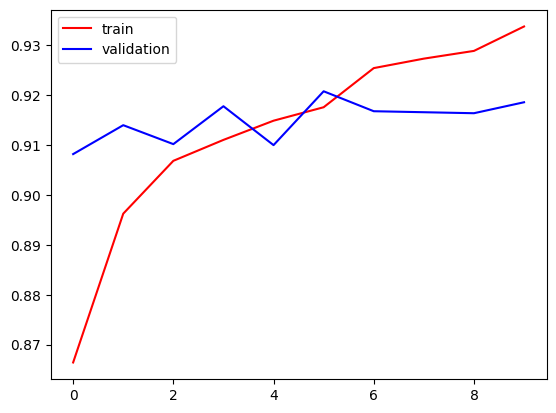

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

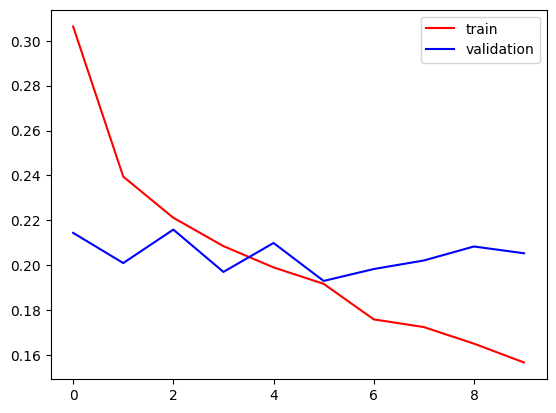

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
#can see here by doing data augmentation we generalize our model so training error and validation error gap
# become less